In [41]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states

# Census API Key
from config import api_key
c = Census(api_key)

In [42]:
#Airbnb data - compare vs City Level Census
#---------------------------------------------------------------------------------------------------------

#read Airbnb csv file 
airbnb_file = "Airbnb_Texas_Rentals.csv"
airbnb_file_df = pd.read_csv(airbnb_file)

#organize DF - add column to display year and convert average_rate_per_night to float
airbnb_year = airbnb_file_df
airbnb_year["date_of_listing"] =pd.to_datetime(airbnb_year["date_of_listing"], errors = 'coerce')
airbnb_year["year"] =airbnb_year["date_of_listing"].dt.year
airbnb_year["average_rate_per_night"] = (airbnb_year["average_rate_per_night"].replace("[\$,]","",regex=True))
airbnb_year["average_rate_per_night"] = airbnb_year["average_rate_per_night"].astype(float)

del airbnb_year["Unnamed: 0"]
airbnb_group = airbnb_year.groupby(["city","year"])

airbnb_final = airbnb_group.mean().round({"average_rate_per_night":2})
airbnb_final.head()


average_rate_per_night   latitude  longitude
city    year                                              
Abilene 2009                   65.00  32.443090 -99.761040
        2013                  211.50  32.446650 -99.737722
        2014                  441.25  32.445006 -99.739053
        2015                  100.12  32.458693 -99.727872
        2016                  146.50  32.411104 -99.747464

In [43]:
#Census Data: City Level
#-------------------------------------------------------------------------------------------

#Extract CSV Census Data 
census_file = "Resources/Texas_Census.csv"
census_file_df = pd.read_csv(census_file)

#Clean up data: Amend the column containing the city name, drop columns we don't need, rename headers.
census_df = census_file_df

census_df["Geography"] = (census_df["Geography"].replace(", Texas","",regex=True))
census_df["Geography"] = (census_df["Geography"].replace(" city","",regex=True))
census_df["Geography"] = (census_df["Geography"].replace(" town","",regex=True))
census_df = census_df.rename(columns={"Geography": "city",})

del census_df["Id"]
del census_df["Id2"]
del census_df["April 1, 2010 - Census"]
del census_df["April 1, 2010 - Estimates Base"]

census_df = census_df.rename(columns={"Population Estimate (as of July 1) - 2010": "Pop. 2010",
                                      "Population Estimate (as of July 1) - 2011": "Pop. 2011",
                                      "Population Estimate (as of July 1) - 2012": "Pop. 2012",
                                      "Population Estimate (as of July 1) - 2013": "Pop. 2013",
                                      "Population Estimate (as of July 1) - 2014": "Pop. 2014", 
                                      "Population Estimate (as of July 1) - 2015": "Pop. 2015",
                                      "Population Estimate (as of July 1) - 2016": "Pop. 2016",
                                      "Population Estimate (as of July 1) - 2017": "Pop. 2017",
                                      "Population Estimate (as of July 1) - 2018": "Pop. 2018",
                                     })


#DF to be used for line graph
census_df_city = census_df.set_index("city")
census_df_city.head()

,Pop. 2010,Pop. 2011,Pop. 2012,Pop. 2013,Pop. 2014,Pop. 2015,Pop. 2016,Pop. 2017,Pop. 2018
city,,,,,,,,,
Abbott,362,362,361,358,354,354,357,363,367
Abernathy,2818,2833,2822,2796,2743,2725,2747,2745,2724
Abilene,117806,118749,119852,119792,120647,121694,121856,122210,122999
Ackerly,220,219,219,225,228,230,231,226,227
Addison,13091,13798,15199,15437,15501,15587,15516,15497,15945


In [44]:
#City samples for visualation: select the highest 4 cities in the 2018 population category
census_city_sort = census_df.sort_values(['Pop. 2018'], ascending=False)
census_city_sort = census_city_sort.reset_index(drop=True)
census_city_max = census_city_sort.head(4)
census_city_max

,city,Pop. 2010,Pop. 2011,Pop. 2012,Pop. 2013,Pop. 2014,Pop. 2015,Pop. 2016,Pop. 2017,Pop. 2018
0,Houston,2098446,2124143,2160086,2198280,2240982,2286630,2309752,2317445,2325502
1,San Antonio,1332883,1357536,1383608,1408787,1435839,1464531,1488512,1511409,1532233
2,Dallas,1200372,1218320,1242344,1259239,1279679,1301794,1324477,1343087,1345047
3,Austin,806423,828694,854841,875463,901734,921545,939768,951750,964254


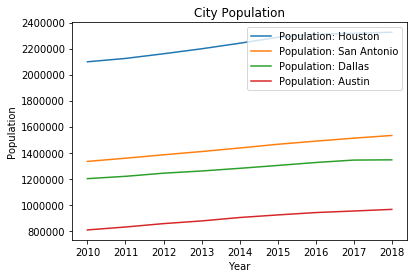

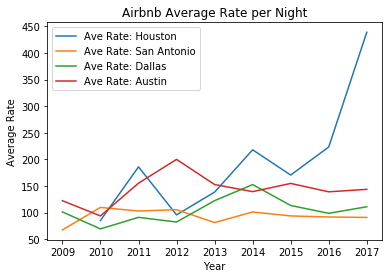

In [45]:
#Visualation: Airbnb average price rates vs city population
#----------------------------------------------------

#Renaming population columns
census_df_city = census_df_city.rename(columns={"Pop. 2010":"2010",
                                      "Pop. 2011": "2011",
                                      "Pop. 2012": "2012",
                                      "Pop. 2013": "2013",
                                      "Pop. 2014": "2014", 
                                      "Pop. 2015": "2015",
                                      "Pop. 2016": "2016",
                                      "Pop. 2017": "2017",
                                      "Pop. 2018": "2018",
                                     })

#to be used in for loops
city_max_index = list(census_city_max.index)

#Graph population of top 4 cities
for city_selection in city_max_index: 
    city_max = census_city_max.iloc[city_selection,0]
    census_city = census_df_city.loc[city_max]
    census_years = census_city.keys()

    plt.plot(census_years, census_city, label="Population: "+city_max )
    plt.legend(loc="best")
    plt.title("City Population")
    plt.xlabel("Year")
    plt.ylabel("Population")

population_city_png= plt.savefig("Population_City.png") 
plt.show()

#Graph Airbnb average price for top 4 cities
for city_selection in city_max_index:
    city_max = census_city_max.iloc[city_selection,0]
    
    airbnb_city = airbnb_final.loc[city_max]
    airbnb_city_rate = airbnb_city.loc[:,"average_rate_per_night"]
    airbnb_years = list(airbnb_city_rate.index.values)

    plt.plot(airbnb_years, airbnb_city_rate, label="Ave Rate: "+city_max )
    plt.legend(loc="best")
    plt.title("Airbnb Average Rate per Night")
    plt.xlabel("Year")
    plt.ylabel("Average Rate")

airbnb_rates_city = plt.savefig("Airbnb_Rates_City.png") 
plt.show()



In [46]:
#Airbnb data - compare vs State Level Census (Texas)
#------------------------------------------------------------------------
#read Airbnb csv file 
airbnb_file_state = "Airbnb_Texas_Rentals.csv"
airbnb_file_state_df = pd.read_csv(airbnb_file_state)

#organize df - add column to display year, convert from currency to float, remove unnecessary columns.
airbnb_year = airbnb_file_state_df

airbnb_year["date_of_listing"] =pd.to_datetime(airbnb_year["date_of_listing"], errors = 'coerce')
airbnb_year["year"] =airbnb_year["date_of_listing"].dt.year

airbnb_year["average_rate_per_night"] = (airbnb_year["average_rate_per_night"].replace("[\$,]","",regex=True))
airbnb_year["average_rate_per_night"] = airbnb_year["average_rate_per_night"].astype(float)
airbnb_year.round({"average_rate_per_night":2})
del airbnb_year["Unnamed: 0"]

airbnb_group_year = airbnb_year.groupby("year")
airbnb_final = airbnb_group_year.mean().round({"average_rate_per_night":2})
airbnb_final.head()

,average_rate_per_night,latitude,longitude
year,,,
2008,129.00,29.266777,-94.828162
2009,132.29,30.917327,-97.780639
2010,140.34,31.367146,-97.537774
2011,185.60,30.842074,-97.356016
2012,190.26,30.704443,-97.299754


In [33]:
#Census Data: Texas - API
#Wrapper resource: https://github.com/datamade/census
#Label resource: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b 
#-------------------------------------------------------------------------------------

#years of Census data 
years = [2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

#Census data storage
census_data = []
census_data_df= pd.DataFrame(census_data)

#Extract census data from API
for year in years:
    census_year = c.acs5.state(("NAME", "B01003_001E","B25035_001E","B01002_001E","B17012_002E"), states.TX.fips, year=year)
    census_year_df = pd.DataFrame(census_year)
    census_year_df["Census Year"] = year
    census_data_df = pd.concat([census_data_df,census_year_df], ignore_index=True)


#DF Cleanup; Rename columns, index by year
census_data_df = census_data_df.rename(columns={"B01002_001E": "Median Age",
                                      "B01003_001E": "Total Population",
                                      "B17012_002E": "Total Families Below Poverty",
                                      "B25035_001E": "Median House Built Year",
                                      "NAME": "State", 
                                      "state": "State Number"})

census_data_df = census_data_df.set_index("Census Year")
del census_data_df["State Number"]
census_data_df

,Median Age,Total Population,Total Families Below Poverty,Median House Built Year,State
Census Year,,,,,
2009,33.0,23819042.0,761834.0,1981,Texas
2010,33.4,24311891.0,777692.0,1982,Texas
2011,33.5,24774187.0,800203.0,1982,Texas
2012,33.6,25208897.0,826695.0,1983,Texas
2013,33.8,25639373.0,850741.0,1983,Texas
2014,33.9,26092033.0,862797.0,1984,Texas
2015,34.1,26538614.0,855896.0,1984,Texas
2016,34.2,26956435.0,835775.0,1985,Texas
2017,34.3,27419612.0,812735.0,1986,Texas


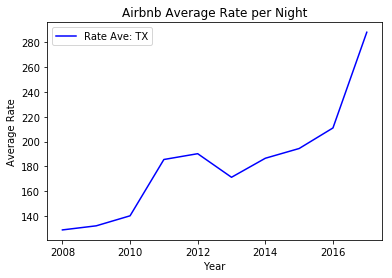

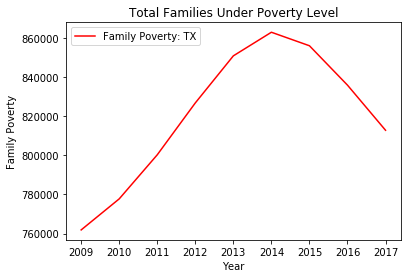

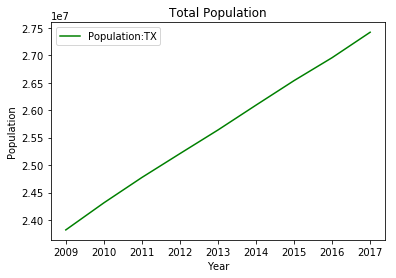

In [47]:
#Data Visualation: Airbnb Ave Price Rate vs TX Population & vs TX Poverty Level
#------------------------------------------------------------------------------------------------

#Airbnb line graph: rate per night average for TX
airbnb_rate = airbnb_final.loc[:,"average_rate_per_night"]
airbnb_years = airbnb_rate.keys()

airbnb_graph, = plt.plot(airbnb_years, airbnb_rate, color="blue", label="Rate Ave: TX")
plt.legend(handles=[airbnb_graph], loc="best")
plt.title("Airbnb Average Rate per Night")
plt.xlabel("Year")
plt.ylabel("Average Rate")
airbnb_rate_state_png= plt.savefig("Airbnb_rate_state.png")
plt.show()

#Census line graph: poverity count for TX
census_poverty = census_data_df.loc[:,"Total Families Below Poverty"]
census_poverty_years = census_poverty.keys()

census_poverty_graph, = plt.plot(census_poverty_years, census_poverty, color="red", label="Family Poverty: TX")
plt.legend(handles=[census_poverty_graph], loc="best")
plt.title("Total Families Under Poverty Level")
plt.xlabel("Year")
plt.ylabel("Family Poverty")
poverty_state_png= plt.savefig("family_poverty_state.png")
plt.show()

#Census line graph: population of TX
census_population = census_data_df.loc[:,"Total Population"]
census_population_years = census_population.keys()

census_population_graph, = plt.plot(census_population_years, census_population, color="green", label="Population:TX")
plt.legend(handles=[census_population_graph], loc="best")
plt.title("Total Population")
plt.xlabel("Year")
plt.ylabel("Population")
population_state_png= plt.savefig("population_state.png")
plt.show()